In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pprint as pp

In [3]:
country_data=pd.read_csv("Resouces/daily_aqi_by_county_2022.csv")
country_data.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2022-01-02,22,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2022-01-05,36,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2022-01-08,35,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2022-01-11,15,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2022-01-14,48,Good,PM2.5,01-003-0010,1


In [4]:
state_data=country_data.groupby("State Name").get_group("New Jersey")
state_data.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
170383,New Jersey,Atlantic,34,1,2022-01-01,23,Good,Ozone,34-001-0006,1
170384,New Jersey,Atlantic,34,1,2022-01-02,26,Good,Ozone,34-001-0006,2
170385,New Jersey,Atlantic,34,1,2022-01-03,27,Good,Ozone,34-001-0006,1
170386,New Jersey,Atlantic,34,1,2022-01-04,27,Good,Ozone,34-001-0006,1
170387,New Jersey,Atlantic,34,1,2022-01-05,26,Good,Ozone,34-001-0006,2


In [5]:
county_data=state_data.groupby("county Name")
county_data.head()
    

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
170383,New Jersey,Atlantic,34,1,2022-01-01,23,Good,Ozone,34-001-0006,1
170384,New Jersey,Atlantic,34,1,2022-01-02,26,Good,Ozone,34-001-0006,2
170385,New Jersey,Atlantic,34,1,2022-01-03,27,Good,Ozone,34-001-0006,1
170386,New Jersey,Atlantic,34,1,2022-01-04,27,Good,Ozone,34-001-0006,1
170387,New Jersey,Atlantic,34,1,2022-01-05,26,Good,Ozone,34-001-0006,2
...,...,...,...,...,...,...,...,...,...,...
175491,New Jersey,Warren,34,41,2022-01-01,33,Good,PM2.5,34-041-0007,1
175492,New Jersey,Warren,34,41,2022-01-02,23,Good,PM2.5,34-041-0007,1
175493,New Jersey,Warren,34,41,2022-01-03,24,Good,Ozone,34-041-0007,1
175494,New Jersey,Warren,34,41,2022-01-04,34,Good,PM2.5,34-041-0007,1


In [6]:
grouped_data = state_data.groupby(['Defining Parameter', 'county Name'])
grouped_data.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
170383,New Jersey,Atlantic,34,1,2022-01-01,23,Good,Ozone,34-001-0006,1
170384,New Jersey,Atlantic,34,1,2022-01-02,26,Good,Ozone,34-001-0006,2
170385,New Jersey,Atlantic,34,1,2022-01-03,27,Good,Ozone,34-001-0006,1
170386,New Jersey,Atlantic,34,1,2022-01-04,27,Good,Ozone,34-001-0006,1
170387,New Jersey,Atlantic,34,1,2022-01-05,26,Good,Ozone,34-001-0006,2
...,...,...,...,...,...,...,...,...,...,...
175508,New Jersey,Warren,34,41,2022-01-18,32,Good,NO2,34-041-0007,1
175516,New Jersey,Warren,34,41,2022-01-26,32,Good,NO2,34-041-0007,1
175538,New Jersey,Warren,34,41,2022-02-17,35,Good,NO2,34-041-0007,1
175545,New Jersey,Warren,34,41,2022-02-24,19,Good,NO2,34-041-0007,1


In [17]:
grouped_mean=grouped_data["AQI"].mean()
grouped_mean

Defining Parameter  county Name
CO                  Essex           2.000000
                    Hudson         37.500000
NO2                 Bergen         32.841584
                    Camden         34.294118
                    Cumberland     25.750000
                    Essex          39.903846
                    Hudson         36.916667
                    Middlesex      29.529412
                    Morris         22.166667
                    Union          36.621622
                    Warren         25.857143
Ozone               Atlantic       33.141343
                    Bergen         41.440678
                    Camden         41.391753
                    Cumberland     37.149351
                    Essex          41.630573
                    Gloucester     44.102459
                    Hudson         40.591716
                    Hunterdon      39.248148
                    Mercer         42.783333
                    Middlesex      40.446215
                    Mon

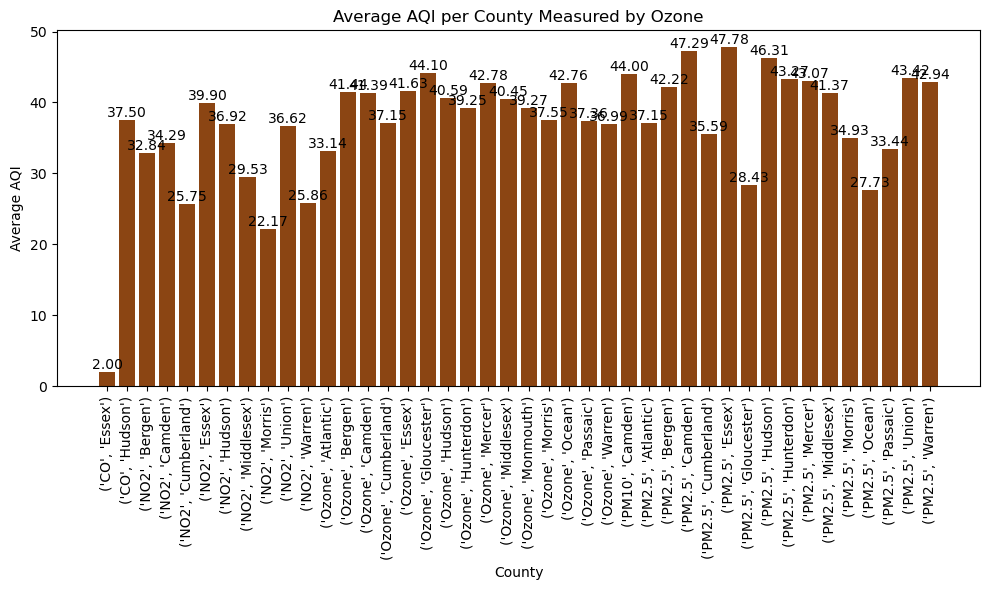

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(range(len(grouped_mean)), grouped_mean, color="saddlebrown", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by the Defining Parameter")
ax.set_xticks(range(len(grouped_mean)))
ax.set_xticklabels(grouped_mean.index, rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')


plt.tight_layout()
plt.show()

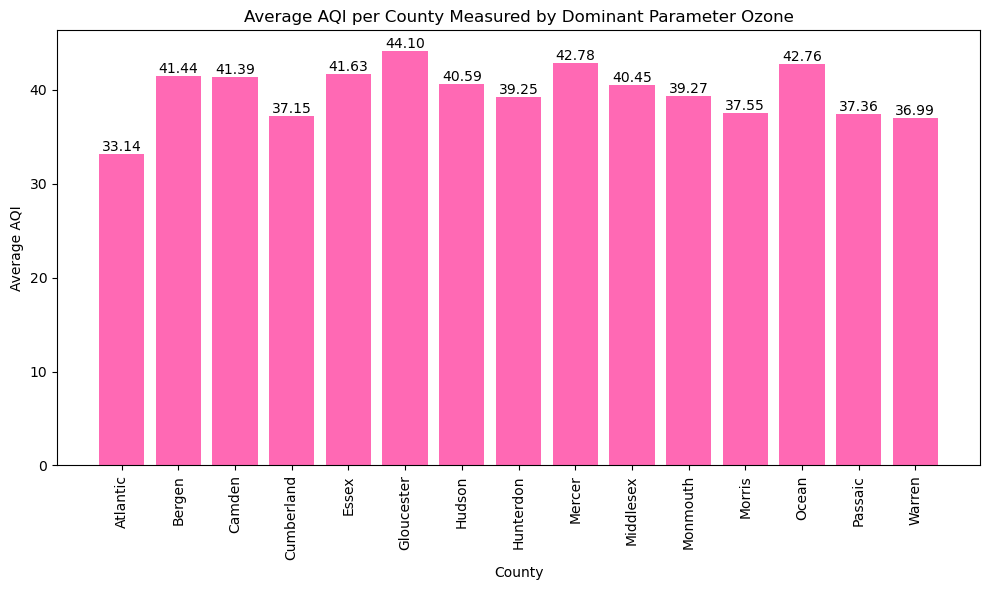

In [21]:
grouped_mean_ozone = grouped_mean[grouped_mean.index.get_level_values(0) == 'Ozone']


fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.bar(range(len(grouped_mean_ozone)), grouped_mean_ozone, color="hotpink", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter Ozone")
ax.set_xticks(range(len(grouped_mean_ozone)))
ax.set_xticklabels(grouped_mean_ozone.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

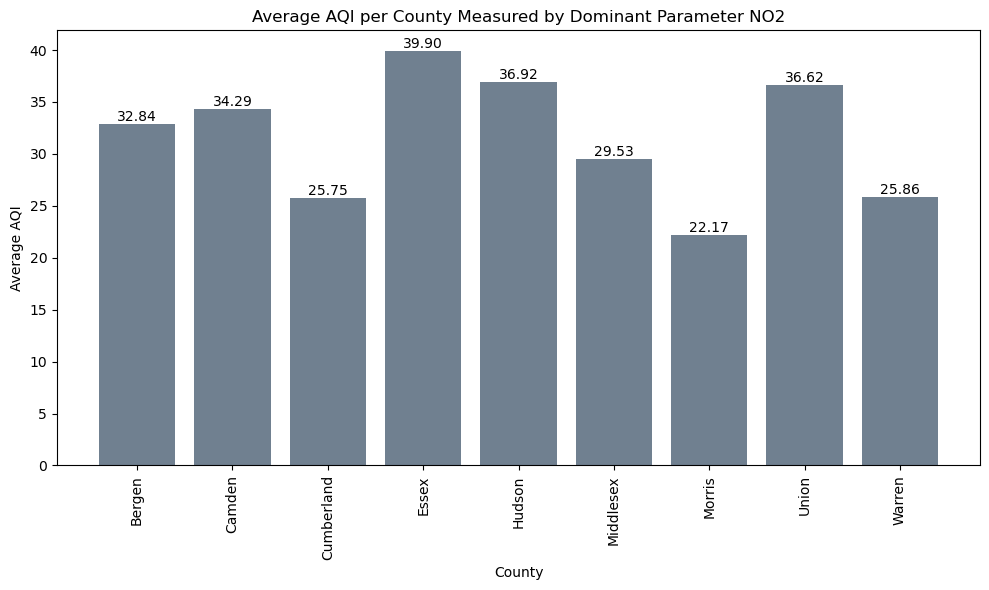

In [22]:
grouped_mean_no2 = grouped_mean[grouped_mean.index.get_level_values(0) == 'NO2']


fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(range(len(grouped_mean_no2)), grouped_mean_no2, color="slategray", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter NO2")
ax.set_xticks(range(len(grouped_mean_no2)))
ax.set_xticklabels(grouped_mean_no2.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}',  # Display the height with two decimal places
            ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

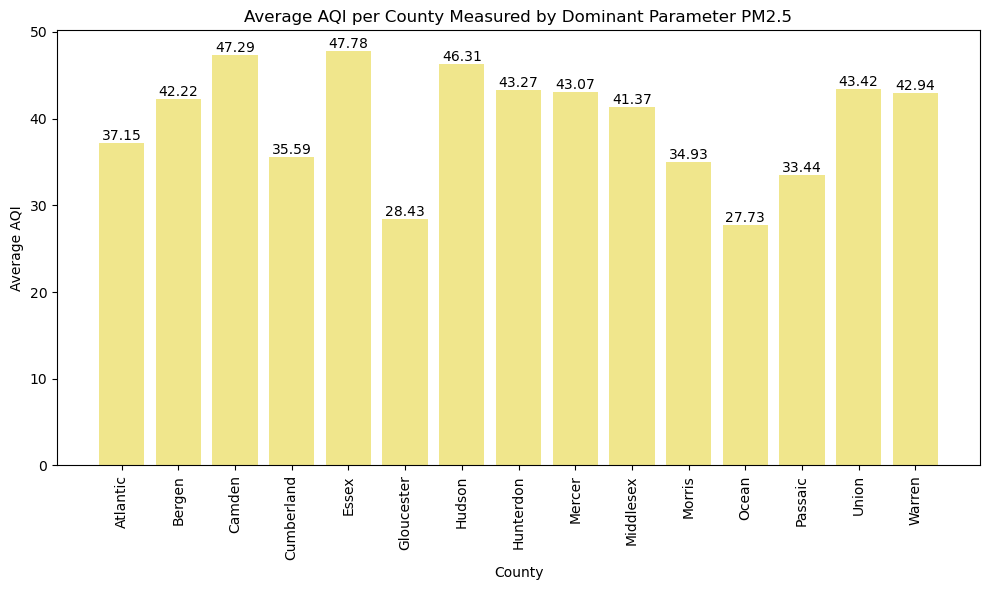

In [25]:
grouped_mean_pm = grouped_mean[grouped_mean.index.get_level_values(0) == 'PM2.5']


fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(range(len(grouped_mean_pm)), grouped_mean_pm, color="khaki", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter PM2.5")
ax.set_xticks(range(len(grouped_mean_pm)))
ax.set_xticklabels(grouped_mean_pm.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}',  # Display the height with two decimal places
            ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()